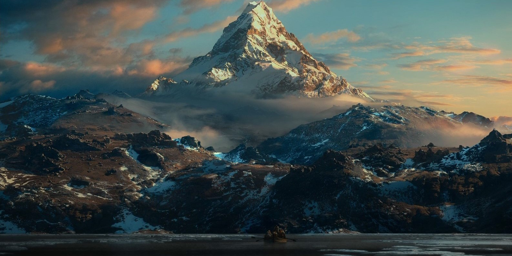

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import requests
url = 'https://static.wikia.nocookie.net/lotr/images/e/e3/Lonely_Mountain_-_DoS.jpg/revision/latest?cb=20200317224945'
im = Image.open(requests.get(url, stream=True).raw)
im.resize((512,256))

In [2]:
img = np.asarray(im.resize((512,256)))
img.shape

(256, 512, 3)

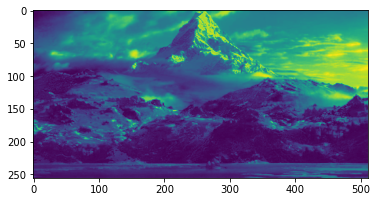

In [3]:
plt.imshow(img[:,:,0])

In [4]:
u0,s0,v_t0 = np.linalg.svd(a=img[:,:,0], full_matrices=False)
len(s0)

256

In [5]:
img_recreated = np.zeros(shape=img.shape)
K = 100
for ch in range(3):
  img1 = img[:,:,ch]
  u,s,v_t = np.linalg.svd(a=img1, full_matrices=False)
  img2 = np.dot(np.dot(u[:,:K],np.diag(s[:K])),v_t[:K,:])
  img2_scaled = (img2-img2.min())/(img2.max()-img2.min())
  img_recreated[:,:,ch] = img2_scaled

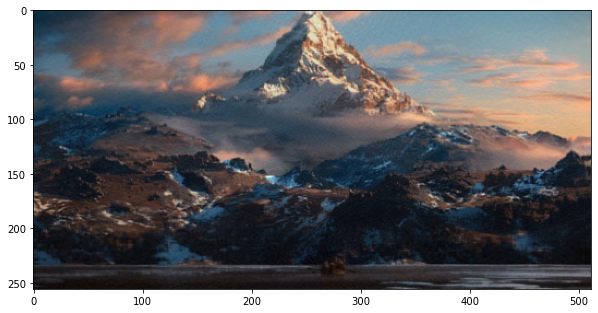

In [6]:
plt.figure(figsize=(10,12))
plt.imshow((img_recreated*255).astype(np.uint8))
plt.show()

In [7]:
np.product(img.shape)

393216

In [8]:
(256*100+512*100)*3+100*3

230700